In [313]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import rcParams
import xgboost as xgb

import scipy.stats as stats
from scipy import stats
from scipy.stats import pointbiserialr, spearmanr, skew, pearsonr

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV, LassoCV
from sklearn import linear_model

%matplotlib inline
# current_palette_1 = sns.color_palette("Set2", 6)
# sns.set_palette(current_palette_1)
# sns.palplot(current_palette_1)

In [314]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [315]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [316]:
df_train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [317]:
#list all columns with missing values train set
na_train = set(df_train.columns[df_train.isnull().any()]) #converted to set for easier calculations
df_train[list(na_train)].info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
Electrical      1459 non-null object
GarageYrBlt     1379 non-null float64
BsmtExposure    1422 non-null object
MiscFeature     54 non-null object
Alley           91 non-null object
BsmtFinType1    1423 non-null object
GarageType      1379 non-null object
BsmtCond        1423 non-null object
MasVnrArea      1452 non-null float64
MasVnrType      1452 non-null object
GarageFinish    1379 non-null object
GarageCond      1379 non-null object
BsmtQual        1423 non-null object
FireplaceQu     770 non-null object
BsmtFinType2    1422 non-null object
PoolQC          7 non-null object
LotFrontage     1201 non-null float64
Fence           281 non-null object
GarageQual      1379 non-null object
dtypes: float64(3), object(16)
memory usage: 216.8+ KB


In [318]:
#list all columns with missing values test set
na_test = set(df_test.columns[df_test.isnull().any()]) #converted to set for easier calculations
df_test[list(na_test)].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 33 columns):
GarageYrBlt     1381 non-null float64
Alley           107 non-null object
Exterior1st     1458 non-null object
MSZoning        1455 non-null object
BsmtUnfSF       1458 non-null float64
FireplaceQu     729 non-null object
MiscFeature     51 non-null object
GarageQual      1381 non-null object
BsmtFinSF2      1458 non-null float64
Exterior2nd     1458 non-null object
GarageArea      1458 non-null float64
GarageCond      1381 non-null object
Utilities       1457 non-null object
BsmtFinType2    1417 non-null object
GarageCars      1458 non-null float64
BsmtExposure    1415 non-null object
BsmtFinType1    1417 non-null object
MasVnrArea      1444 non-null float64
GarageFinish    1381 non-null object
BsmtQual        1415 non-null object
PoolQC          3 non-null object
TotalBsmtSF     1458 non-null float64
Fence           290 non-null object
Functional      1457 non-null object
BsmtHa

In [319]:
#missing elements unique to train set
df_train[list(na_train - na_test)].info() # '-' is doing set operation here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
Electrical    1459 non-null object
dtypes: object(1)
memory usage: 11.5+ KB


In [320]:
#missing elements unique to test set
df_test[list(na_test.difference(na_train))].info() # same as above

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 15 columns):
Functional      1457 non-null object
BsmtFinSF2      1458 non-null float64
BsmtHalfBath    1457 non-null float64
KitchenQual     1458 non-null object
SaleType        1458 non-null object
Exterior1st     1458 non-null object
Exterior2nd     1458 non-null object
BsmtFullBath    1457 non-null float64
MSZoning        1455 non-null object
BsmtUnfSF       1458 non-null float64
GarageArea      1458 non-null float64
BsmtFinSF1      1458 non-null float64
Utilities       1457 non-null object
TotalBsmtSF     1458 non-null float64
GarageCars      1458 non-null float64
dtypes: float64(8), object(7)
memory usage: 171.1+ KB


Missing data in the follwing columns may refer to missing feature  not missing data, for eg a nan value in GarageType means no Garage.
- Alley;
- MasVnrType (Masonry veneer type) and MasVnrArea (its area);
- BsmtQual and BsmtCond (two parameters of basement);
- BsmtExposure (Walkout or garden level basement walls);
- BsmtFinType1 and BsmtFinType2 (Quality of basement finished area) and BsmtFinSF1, BsmtFinSF2 (their area);
- BsmtUnfSF (Unfinished square feet of basement area);
- FireplaceQu (Fireplace quality);
- GarageType, GarageFinish, GarageQual, GarageCond (garage parameters) and GarageYrBlt;
- KitchenQual;
- PoolQC;
- Fence;
- MiscFeature (Miscellaneous feature not covered in other categories)

In [321]:
#let's replace the items above witn None or 0
to_null = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
           'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt', 'BsmtFullBath', 'BsmtHalfBath',
           'PoolQC', 'Fence', 'MiscFeature']
for col in to_null:
    if df_train[col].dtype == 'object':

        df_train[col].fillna('None',inplace=True)
        df_test[col].fillna('None',inplace=True)
    else:

        df_train[col].fillna(0,inplace=True)
        df_test[col].fillna(0,inplace=True)

In [322]:
# df_train.loc[df_train.isnull().any()]
df_train.columns[df_train.isnull().any()]

Index(['LotFrontage', 'MasVnrArea', 'Electrical'], dtype='object')

In [323]:
df_test.columns[df_test.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'KitchenQual', 'Functional', 'GarageCars', 'GarageArea', 'SaleType'],
      dtype='object')

And for some other features missing values can be replaced by their mode.

- MSZoning (The general zoning classification);
- Utilities;
- Exterior1st and Exterior2nd (Exterior covering on house);
- KitchenQual;
- Functional (Home functionality rating);
- SaleType;
- Electrical;
- LotFrontage;
- GarageCars and GarageArea;

In [324]:
# fill NA with common values
to_mode = ['KitchenQual','MSZoning','Utilities','Exterior1st','Exterior2nd','Functional','SaleType']
mode = df_test[to_mode].mode()
df_test[to_mode] = df_test[to_mode].fillna(mode.iloc[0],inplace=True)
df_train["Electrical"].fillna(df_train['Electrical'].mode()[0],inplace=True)

# some values need to be filled with mean
df_train["LotFrontage"].fillna(df_train['LotFrontage'].mean(),inplace=True)
df_test["LotFrontage"].fillna(df_test['LotFrontage'].mean(),inplace=True)

/home/tan/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


There are still several linked cases, for eg if there is no veneer i.e MasVnrType is None, MasVnrArea should be 0. Let's take care of those now

In [325]:
df_train.loc[df_train.MasVnrType == 'None', 'MasVnrArea'] = 0
df_test.loc[df_test.MasVnrType == 'None', 'MasVnrArea'] = 0
df_test.loc[df_test.BsmtFinType1=='None', 'BsmtFinSF1'] = 0
df_test.loc[df_test.BsmtFinType2=='None', 'BsmtFinSF2'] = 0
df_test.loc[df_test.BsmtQual=='None', 'BsmtUnfSF'] = 0
df_test.loc[df_test.BsmtQual=='None', 'TotalBsmtSF'] = 0
df_test.loc[df_test.GarageCars.isnull(), 'GarageCars'] = 0
df_test.loc[df_test.GarageArea.isnull(), 'GarageArea'] = 0

# Data Visualization

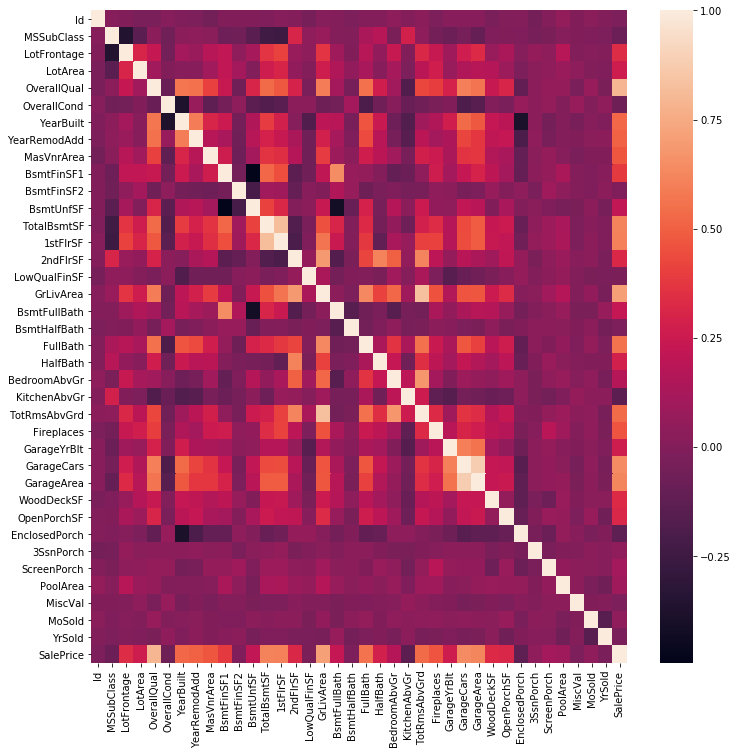

In [326]:
# Lets start with a heatmap
corr = df_train.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,vmax=1)

But this heatmap shows values only for numerical features. Lets write a function to find correlation between any dtype

In [345]:
# I could have separated the data into numerical and cateforical subsets and applies pandas' pearson or spearman
# to it. This function is more simple and efficient but ugly 
threshold = 0.8 # Threshold value.
def correlation():
    for i in df_train.columns:
        for j in df_train.columns[list(df_train.columns).index(i) + 1:]: # remove redundancies
            if df_train[i].dtype != 'object' and df_train[j].dtype != 'object':
                #pearson is used by default for numerical.
                if abs(pearsonr(df_train[i], df_train[j])[0]) >= threshold:
                    yield (pearsonr(df_train[i], df_train[j])[0], i, j)
            else:
                #spearman works for categorical.
                if abs(spearmanr(df_train[i], df_train[j])[0]) >= threshold:
                    yield (spearmanr(df_train[i], df_train[j])[0], i, j)

In [346]:
corr_list = list(correlation())
corr_list

/home/tan/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


[(0.85848725676346904, 'Exterior1st', 'Exterior2nd'),
 (-0.89606878858916439, 'BsmtFinType2', 'BsmtFinSF2'),
 (0.81952997500503311, 'TotalBsmtSF', '1stFlrSF'),
 (0.82548937430884295, 'GrLivArea', 'TotRmsAbvGrd'),
 (0.88247541428146214, 'GarageCars', 'GarageArea'),
 (-0.99999111097112325, 'PoolArea', 'PoolQC'),
 (0.9028952966055307, 'MiscFeature', 'MiscVal')]

These are the most highly correlated features but not too high to be removed. S we will keep these.